# 第27讲：快速傅里叶变换（信号识别）

## 快速傅里叶分析模块

scipy.fftpack

* fft, 
*  fft2, 
* fftfreq, 
* fftn, 
* fftshift, 
* ifft,
* ifft2,
* ifftn,
* ifftshift

## 信号频谱分析编程思路:

### 1. 明确分析对象的类型：

1. 已知演化规律的周期信号
2. 未知演化规律但周期T已知的周期信号
3. 未知演化规律周期T也未知的周期信号
4. 已知演化规律的非周期信号
5.  知演化规律的非周期信号
  
### 2. 依据分析对象的特点确定采样指标

采样区间 ：0~tao,

对于已知周期的信号，tao=T;

对于未知周期的信号，tao。

**尽可能大（越大越好），tao决定能够识别出的信号基频F=1/tao。**
        
采样间隔(周期)：dt =tao/n,

n为采样数目，n越大能够识别出的信号频率成分越多，原则上n尽可能取大。

**能够识别出的信号最高频率fh=nh/tao, nh=n//2.**

采样窗函数的类型：默认加矩形窗，也可以加识别率更高的汉宁窗、哈明窗等

### 3. 时间采样  

```
ts=np.linspace(0,tao-dt,tao/dt)
```

###  4. 信号采样

对于已知演化规律的周期信号，可用数学手段采样,先定义一个周期的信号:

```
def tri(t):
if t>T:
    s,t=divmod(t,T)
    
if 0<=t<T/2:
    return 2*t
else:
    return  2*(1-t/T)

ys=np.array(list(map(tri,ts)))
```

对于未知演化规律的信号，用采样设备观察测量，对信号按照选定的tao,dt(或n)物理采样n个数据，并存入文本文件data.txt ,必要时用ys=np.loadtxt('data.txt')导入Python环境内存。

### 5. 加窗  

```
w=np.hanning(n)
y=ys*w

```

###  6. 构造频率向量 

```
f=np.arange(nh)*F    # nh=n//2, F=1/tao
```

### 7. 导入scipy.fftpack的快速傅里叶变换函数,计算信号的FFT，也即复数频谱数据 

```
from scipy.fftpack import  fft,ifft

nh=(n/2).round();

Y=fft(y);

Yh=2*Y[:nh]/n;

Yh[0]/=2

```

###  8.  计算信号格频率成分的振幅和相位，并画幅频杆图和相频杆图
```
A=np.abs(Yh);phi=np.angle(Yh)

from matplotlib import pyplot as plt

plt.subplot(1,3,1);
plt.stem(f,A,'r-.',lw=2);
plt.title('A(f)');
plt.xlabel('f/HZ')

plt.subplot(1,3,2);
plt.stem(f,phi,'g-.',lw=2);
plt.title('phi(f)');
plt.xlabel('f/Hz')
```
### 9. 用频谱重构时域信号与原信号比较判断频谱分析误差

```
hc=0;
k=round(n/10)
for i in range(k):
    hc+=A[i]*np.cos(2*np.pi*f[i]*ts+phi[i])
    
plt.subplot(1,3,3);
plt.plot(ts,hc,'b-',lw=2);
plt.stem(ts,ys,'c');
plt.xlabel('t/sec');
plt.ylabel('s(t)/hc(t)')

```

### 最后 写信号频谱分析报告

对于已知周期的周期信号，上面9步可以给出正确的信号频谱。
对于周期未知的信号，上面8步给出的分析结论，可能有参考价值，也可能毫无意义。

这种情况，需要从FFT复数频谱数据出发，再采用龙姝明 AWPAM（Amplitude wave packet analysis method)，进一步分析计算，才能获得信号的频谱数据。

## 周期已知的周期三角波频谱分析程序设计

error= 0.0 %


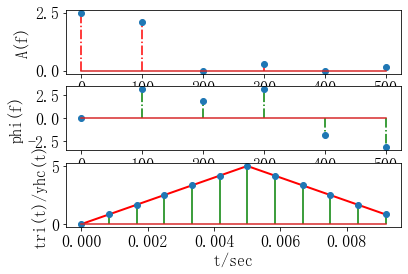

f  = [  0. 100. 300. 500.]
A  = [2.5        2.07336156 0.27777778 0.14886066]
phi= [ 0.          3.14159265  3.14159265 -3.14159265]


In [9]:
#encoding=gb2312
from scipy.fftpack import fft,ifft
from matplotlib import pyplot as plt

npp=plt.np;
T=0.01;
Am=5;
tao=T;
n=12

def tri(t):
    if t>T:
        s,t=divmod(t,T)
    if 0<=t<T/2:
        return 2*Am*t/T
    else:
        return 2*Am*(1-t/T)
    
nh=n//2
dt=tao/n;
ts=npp.linspace(0,tao-dt,n)
F=1/tao
f=npp.arange(nh)*F

ys=npp.array(list(map(tri,ts)))

# w=npp.hanning(n);y=ys*w

y=ys
Y=2*fft(y)/n;
Yh=Y[:nh];
Yh[0]/=2
A=npp.abs(Yh);
phi=npp.angle(Yh)

k=min(nh,30)#只显示k个频率成分
Aout=A[:k];
fout=f[:k];
phiout=phi[:k]

plt.rcParams['font.sans-serif']=['SimSun']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.size']=16

plt.subplot(3,1,1)
plt.stem(fout,Aout,'r-.',use_line_collection=True)
plt.ylabel('A(f)');
plt.xlabel('f/Hz')

plt.subplot(3,1,2)
plt.stem(fout,phiout,'g-.',use_line_collection=True)
plt.ylabel('phi(f)');
plt.xlabel('f/Hz')

yhc=0;#合成信号
for i in range(nh):
    yhc+=A[i]*npp.cos(2*npp.pi*f[i]*ts+phi[i])
    
ysm=max(ys)#计算误差
er=100*npp.abs((yhc-ys)/ysm)

print('error=',round(max(er),2),'%')

plt.subplot(3,1,3)#画信号波形
plt.plot(ts,yhc,'r-',lw=2)
plt.stem(ts,ys,'g',use_line_collection=True)
plt.xlabel('t/sec')
plt.ylabel('tri(t)/yhc(t)')
plt.show()
flag=A/max(A)>0.008
print('f  =',f[flag])#输出相对振幅>0.008的成分
print('A  =',A[flag])
print('phi=',phi[flag])

# 一、傅里叶变换
傅里叶变换是信号领域沟通时域和频域的桥梁，在频域里可以更方便的进行一些分析。傅里叶主要针对的是平稳信号的频率特性分析，简单说就是具有一定周期性的信号，因为傅里叶变换采取的是有限取样的方式，所以对于取样长度和取样对象有着一定的要求。
## 二、基于Python的频谱分析


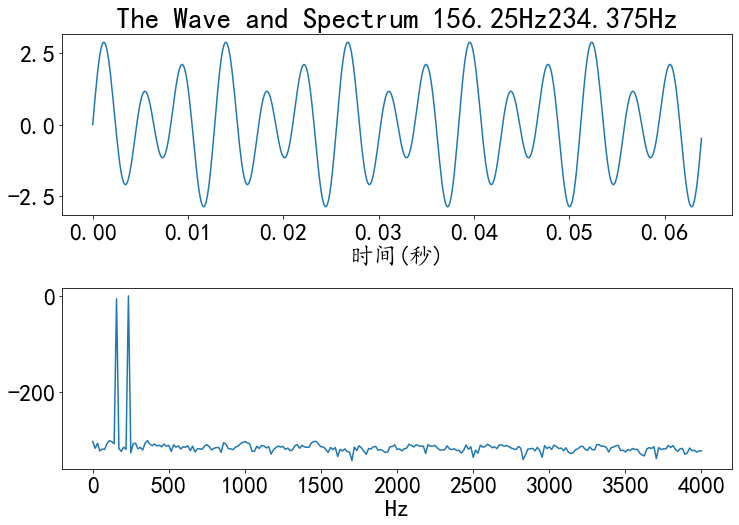

In [9]:
# _*_ coding:utf-8 _*_
import numpy as np                    #导入一个数据处理的模块
from matplotlib import pyplot as  pl #导入一个绘图模块，matplotlib下的模块

sampling_rate = 8000 ##取样频率
fft_size =512        #FFT处理的取样长度
t = np.arange(0,1.1,1.0/sampling_rate)   #np.arange(起点，终点，间隔)产生1s长的取样时间

x = np.sin(2*np.pi*156.25*t)+2*np.sin(2*np.pi*234.375*t)

#两个正弦波叠加，156.25HZ和234.375HZ，因此如上面简单的介绍FFT对于取样时间有要求，
#N点FFT进行精确频谱分析的要求是N个取样点包含整数个取样对象的波形。
#因此N点FFT能够完美计算频谱对取样对象的要求是n*Fs/N（n*采样频率/FFT长度），

#因此对8KHZ和512点而言，完美采样对象的周期最小要求是8000/512=15.625HZ,所以156.25的n为10,234.375的n为15。

xs = x[:fft_size]    # 从波形数据中取样fft_size个点进行运算
xf = np.fft.rfft(xs)/fft_size 
# 利用np.fft.rfft()进行FFT计算，rfft()是为了更方便对实数信号进行变换，
# 由公式可知/fft_size为了正确显示波形能量rfft函数的返回值是N/2+1个复数，
# 分别表示从0(Hz)到sampling_rate/2(Hz)的分。

#于是可以通过下面的np.linspace计算出返回值中每个下标对应的真正的频率：
freqs = np.linspace(0,sampling_rate/2,int(fft_size/2+1))
# np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None) 
#在指定的间隔内返回均匀间隔的数字
xfp = 20*np.log10(np.clip(np.abs(xf),1e-20,1e1000))
#最后我们计算每个频率分量的幅值，并通过 20*np.log10() 
#将其转换为以db单位的值。为了防止0幅值的成分造成log10无法计算，
#我们调用np.clip对xf的幅值进行上下限处理

pl.rcParams['font.size']=24
pl.rcParams['font.sans-serif']=['KaiTi']
pl.rcParams['axes.unicode_minus']=False

pl.figure(figsize=(12,8))
pl.subplot(211)

pl.plot(t[:fft_size], xs)
pl.xlabel(u"时间(秒)")
pl.title(u"The Wave and Spectrum 156.25Hz234.375Hz")
pl.subplot(212)
pl.plot(freqs, xfp)
pl.xlabel(u"Hz")
pl.subplots_adjust(hspace=0.4)
pl.show()

#绘图显示结果 

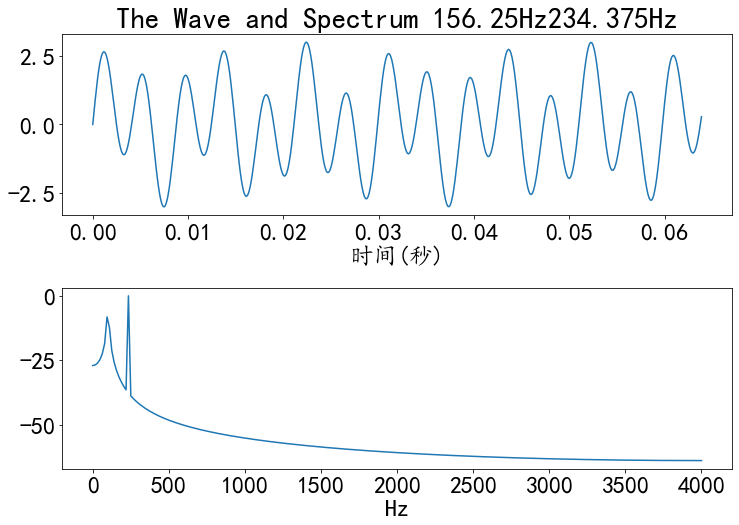

In [11]:
#现在来看看频谱泄露，将采样对象的频率改变
x = np.sin(2*np.pi*100*t)+2*np.sin(2*np.pi*234.375*t)

xs = x[:fft_size]    # 从波形数据中取样fft_size个点进行运算
xf = np.fft.rfft(xs)/fft_size 

freqs = np.linspace(0,sampling_rate/2,int(fft_size/2+1))

xfp = 20*np.log10(np.clip(np.abs(xf),1e-20,1e1000))


pl.rcParams['font.size']=24
pl.rcParams['font.sans-serif']=['KaiTi']
pl.rcParams['axes.unicode_minus']=False

pl.figure(figsize=(12,8))
pl.subplot(211)

pl.plot(t[:fft_size], xs)
pl.xlabel(u"时间(秒)")
pl.title(u"The Wave and Spectrum 156.25Hz234.375Hz")
pl.subplot(212)
pl.plot(freqs, xfp)
pl.xlabel(u"Hz")
pl.subplots_adjust(hspace=0.4)
pl.show()


我们明显看出，第一个对象的频谱分析出现“泄露”，能量分散到其他频率上，没法准确计算到计算对象的频谱特性。

## 窗函数
上面我们可以看出可以通过加“窗”函数的方法来处理，尽量保证FFT长度内
的取样对象是对称的。


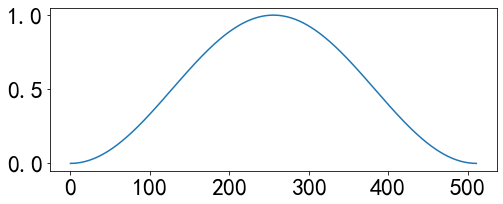

In [17]:
import numpy as np                    
from matplotlib import pyplot as  pl
import scipy.signal as signal
pl.figure(figsize=(8,3))
#pl.plot(signal.hann(512))#汉明窗函数 
pl.plot(np.hanning(512))
pl.show()

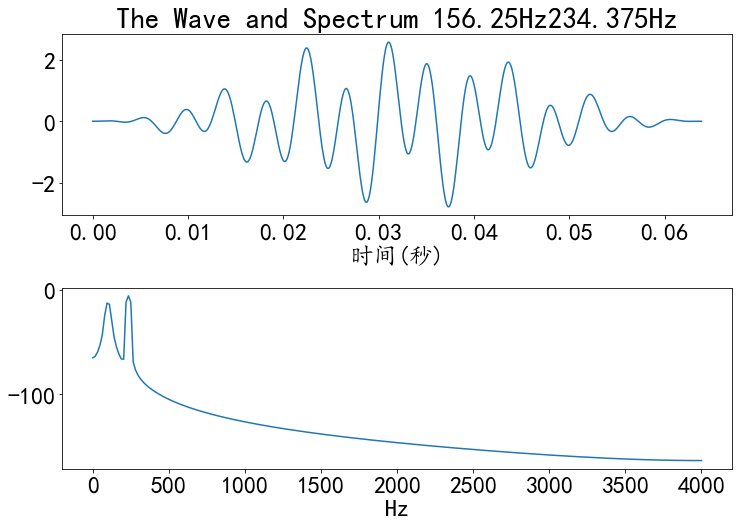

In [18]:
import numpy as np                    
from matplotlib import pyplot as  pl

w=np.hanning(512)
x= np.sin(2*np.pi*100*t)+2*np.sin(2*np.pi*234.375*t)
xs1 = x[:fft_size]    # 从波形数据中取样fft_size个点进行运算
xs=xs1 *w

xf = np.fft.rfft(xs)/fft_size 

freqs = np.linspace(0,sampling_rate/2,int(fft_size/2+1))

xfp = 20*np.log10(np.clip(np.abs(xf),1e-20,1e1000))


pl.rcParams['font.size']=24
pl.rcParams['font.sans-serif']=['KaiTi']
pl.rcParams['axes.unicode_minus']=False

pl.figure(figsize=(12,8))
pl.subplot(211)

pl.plot(t[:fft_size], xs)
pl.xlabel(u"时间(秒)")
pl.title(u"The Wave and Spectrum 156.25Hz234.375Hz")
pl.subplot(212)
pl.plot(freqs, xfp)
pl.xlabel(u"Hz")
pl.subplots_adjust(hspace=0.4)
pl.show()